In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import numpy as np

In [7]:
df=pd.read_csv('Google_Stock_Price_Train.csv',index_col='Date',parse_dates=True)

In [8]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,325.25,332.83,324.97,663.59,"7,380,500"
2012-01-04,331.27,333.87,329.08,666.45,"5,749,400"
2012-01-05,329.83,330.75,326.89,657.21,"6,590,300"
2012-01-06,328.34,328.77,323.68,648.24,"5,405,900"
2012-01-09,322.04,322.29,309.46,620.76,"11,688,800"


In [9]:
df.shape

(1258, 5)

In [11]:
df.isna().any()

Open      False
High      False
Low       False
Close     False
Volume    False
dtype: bool

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2012-01-03 to 2016-12-30
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1258 non-null   float64
 1   High    1258 non-null   float64
 2   Low     1258 non-null   float64
 3   Close   1258 non-null   object 
 4   Volume  1258 non-null   object 
dtypes: float64(3), object(2)
memory usage: 59.0+ KB


<AxesSubplot:xlabel='Date'>

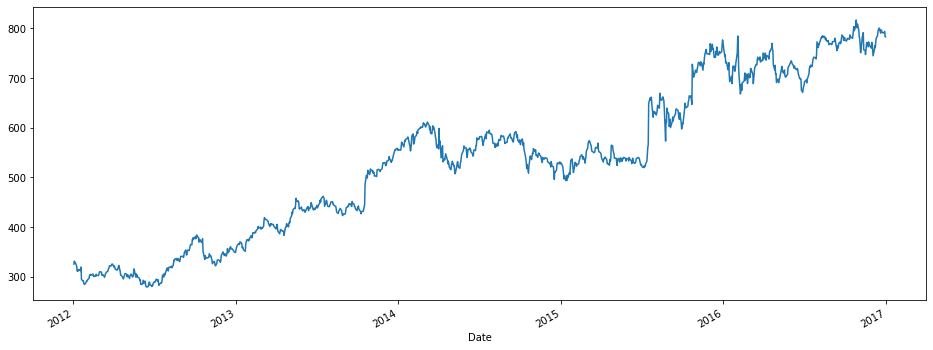

In [13]:
df['Open'].plot(figsize=(16,6))

<AxesSubplot:xlabel='Date'>

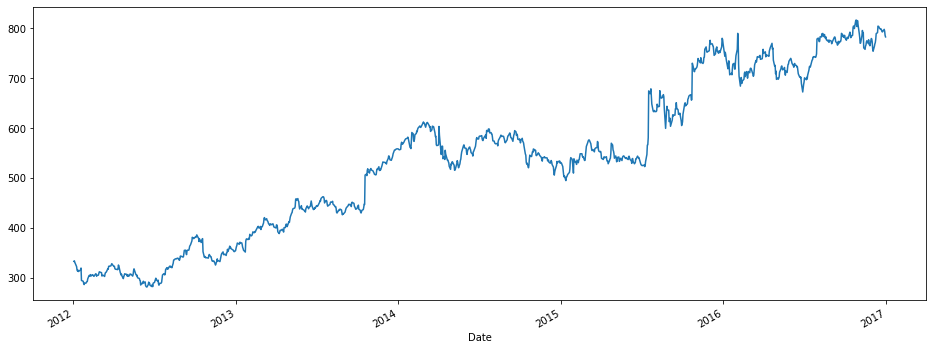

In [14]:
df['High'].plot(figsize=(16,6))

In [17]:
#Changing the datatype of close and volume t ofloat
df['Close']=df['Close'].str.replace(',','').astype(float)
df['Volume']=df['Volume'].str.replace(',','').astype(float)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2012-01-03 to 2016-12-30
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1258 non-null   float64
 1   High    1258 non-null   float64
 2   Low     1258 non-null   float64
 3   Close   1258 non-null   float64
 4   Volume  1258 non-null   float64
dtypes: float64(5)
memory usage: 59.0 KB


<AxesSubplot:xlabel='Date'>

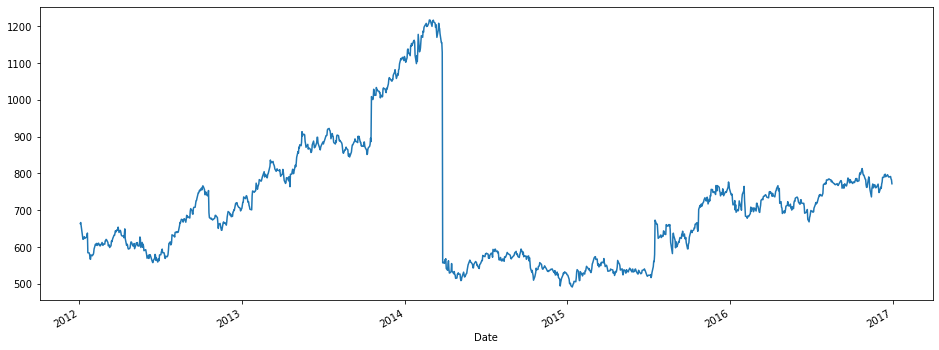

In [19]:
df['Close'].plot(figsize=(16,6))

In [21]:
#7 day rolling mean
df.rolling(7).mean().head(20)
#Pandas dataframe.rolling() function provides the feature of rolling window calculations. 
#The concept of rolling window calculation is most primarily used in signal processing and time-series data.


,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,NaN,NaN,NaN,NaN,NaN
2012-01-04,NaN,NaN,NaN,NaN,NaN
2012-01-05,NaN,NaN,NaN,NaN,NaN
2012-01-06,NaN,NaN,NaN,NaN,NaN
2012-01-09,NaN,NaN,NaN,NaN,NaN
2012-01-10,NaN,NaN,NaN,NaN,NaN
2012-01-11,323.002857,325.392857,318.682857,643.132857,7.208100e+06
2012-01-12,321.457143,322.882857,316.841429,638.037143,6.691514e+06
2012-01-13,318.698571,319.801429,314.025714,631.870000,6.531857e+06


<AxesSubplot:xlabel='Date'>

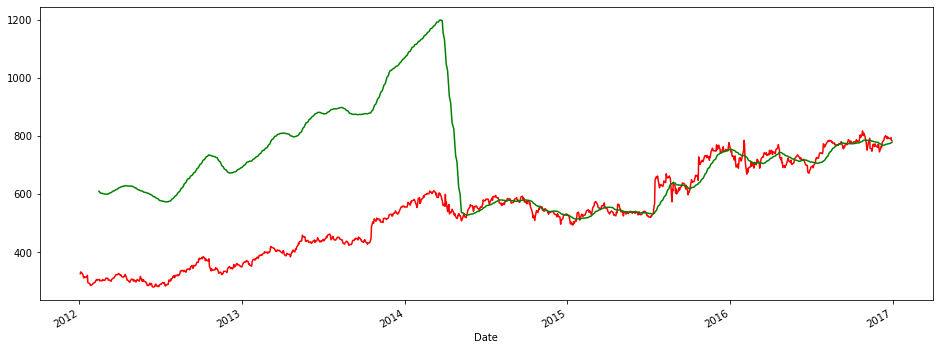

In [22]:
df['Open'].plot(figsize=(16,6),color='r')
df.rolling(window=30).mean()['Close'].plot(color='g')

<AxesSubplot:xlabel='Date'>

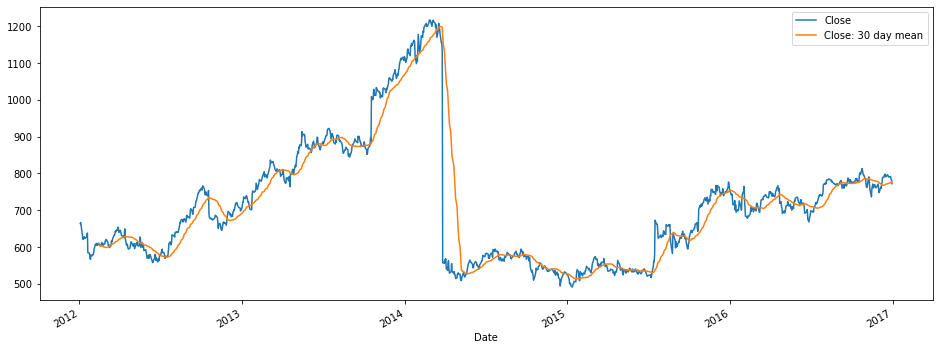

In [23]:
df['Close: 30 day mean']=df.rolling(window=30).mean()['Close']
df[['Close','Close: 30 day mean']].plot(figsize=(16,6))

<AxesSubplot:xlabel='Date'>

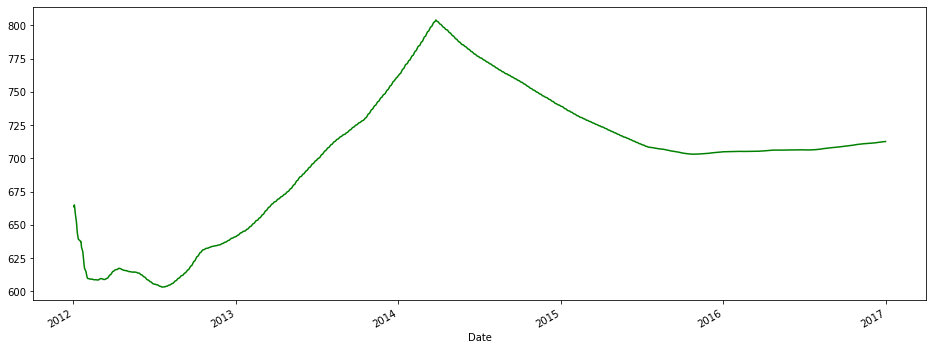

In [24]:
#optimal specify a mnimum number of periods
df['Close'].expanding(min_periods=1).mean().plot(figsize=(16,6),color='g')

In [25]:
training_set=df['Open']
training_set=pd.DataFrame(training_set)